# Importing the required Libraries

In [1]:
#print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import graphviz


# Reading the CSV file from the machine

In [5]:
wine= pd.read_csv("D:\Module3_RP\Session1\winequality-white.csv", sep=';')

# Exploratory Data Analysis of the given data:

In [7]:
wine.describe(include = 'all')
wine.head(5)
wine.shape
wine.columns

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Rename Columns names to remove spaces

In [ ]:
wine.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

Once again exploring the data

In [10]:
wine.info()
wine.head()
wine.shape
wine.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Understand the distribution of the Wine Quality

In [12]:
wine.groupby('quality').size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

# Create Categorical Bins(Binning) for the Wine Quality

To avoid the misclassification of the categories which has less sample size

In [14]:
bins=(2,5,6,9)
names=[1,2,3]
wine['quality_type']=pd.cut(wine['quality'],bins=bins,labels=names)

In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


In [17]:
wine.groupby('quality_type').size()

quality_type
1    1640
2    2198
3    1060
dtype: int64

# Convert pandas column type from Categorical to Numerical

In [18]:
wine['quality_type']=pd.to_numeric(wine['quality_type'])

In [19]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


# Generate Pandas Profiling Report

In [20]:
eda_report = pandas_profiling.ProfileReport(wine)
eda_report.to_file("wineClassification_eda.html")

# Creating Features and Labels

Lables/Dependent Variable: QUALITY_TYPE

Features/Independent Variables: All Columns otherthan Quality and Quality Type

In [21]:
x=wine.drop(['quality','quality_type'],axis=1,inplace=False) #
y=wine['quality_type']           

In [23]:
x.shape
y.shape

(4898, 11)

(4898,)

In [24]:
x.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [27]:
y

0       2
1       2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
10      1
11      1
12      1
13      3
14      1
15      3
16      2
17      3
18      2
19      1
20      3
21      3
22      3
23      1
24      2
25      2
26      2
27      2
28      2
29      3
       ..
4868    2
4869    2
4870    3
4871    2
4872    1
4873    2
4874    2
4875    2
4876    3
4877    1
4878    1
4879    2
4880    2
4881    2
4882    1
4883    2
4884    1
4885    2
4886    3
4887    3
4888    1
4889    2
4890    2
4891    2
4892    1
4893    2
4894    1
4895    2
4896    3
4897    2
Name: quality_type, Length: 4898, dtype: int64

# Split Train and Test Data

Train Data=75% Test Data=25%

In [28]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 11)

(3428,)

(1470, 11)

(1470,)

# Instatiate the model

In [35]:
from sklearn import tree
my_tree_one=tree.DecisionTreeClassifier(max_depth=2)
my_tree_one

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Fitting the Decision Tree Model on your Features and Labels

In [38]:
my_tree_one =my_tree_one.fit(train_x, train_y)


# Predicting on Test Data

In [39]:
predicted=my_tree_one.predict(test_x)

# Model Performance Evaluation

In [41]:
metrics.accuracy_score(predicted,test_y)

0.5197278911564626

In [45]:
print(metrics.classification_report(predicted,test_y))

              precision    recall  f1-score   support

           1       0.40      0.62      0.49       306
           2       0.64      0.48      0.55       866
           3       0.46      0.51      0.48       298

   micro avg       0.52      0.52      0.52      1470
   macro avg       0.50      0.54      0.51      1470
weighted avg       0.55      0.52      0.52      1470



Confusion Matrix


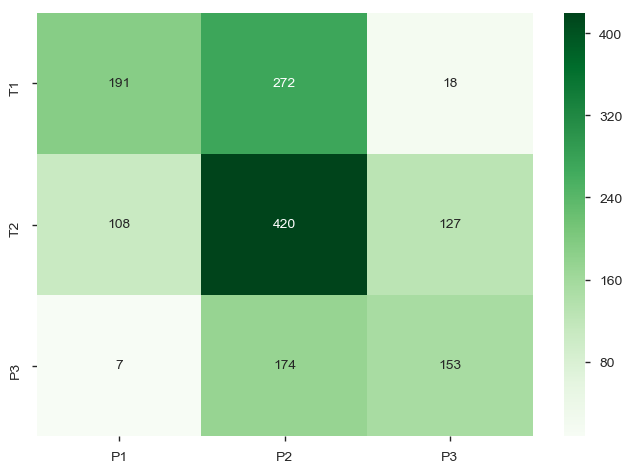

In [52]:
#Confusion matrix
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,predicted)
lbl1=["P1","P2","P3"]
lbl2=["T1","T2","P3"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();

# Feature Importance

In [49]:
my_tree_one.feature_importances_,x.columns
features=pd.DataFrame(my_tree_one.feature_importances_,x.columns)
features
features.columns=["Importance"]
features


(array([0.        , 0.30998182, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.69001818]),
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol'],
       dtype='object'))

,0
fixed acidity,0.000000
volatile acidity,0.309982
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,0.000000
density,0.000000
pH,0.000000
sulphates,0.000000


,Importance
fixed acidity,0.000000
volatile acidity,0.309982
citric acid,0.000000
residual sugar,0.000000
chlorides,0.000000
free sulfur dioxide,0.000000
total sulfur dioxide,0.000000
density,0.000000
pH,0.000000
sulphates,0.000000


# Decision Tree Visualization

In [56]:
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=2)
clf = clf.fit(train_x, train_y)

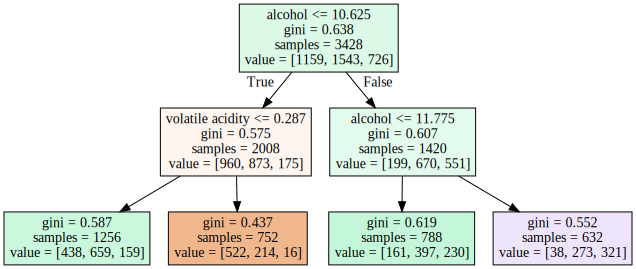

In [57]:
# Visualize the decision tree graph
# conda install -c anaconda graphviz
# conda install -c conda-forge python-graphviz
import graphviz
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(clf, out_file=dotfile, feature_names=list(train_x.columns.values), filled=True)
    dotfile.close()
    
from graphviz import Source

with open('tree.dot', 'r') as f:
    text=f.read()
    plot=Source(text)
plot

# Decision Tree Hyperparameters Optimization using Cross-Validation and gridsearch

In [58]:
criterion=['gini','entropy']
min_samples=[2,10,20,50,100]
max_depth=[20,30,40,50,None]

In [61]:
param_grid={'criterion':criterion, 'min_samples_split': min_samples,'max_depth':max_depth}
dt_g=GridSearchCV(my_tree_one,param_grid,cv=5,verbose=2,n_jobs=-1)
dt_g.fit(train_x,train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 50, 100], 'max_depth': [20, 30, 40, 50, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [62]:
dt_g.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
dt_g.best_score_

0.6155192532088681

In [64]:
dt_g.best_index_

25

In [65]:
cv=pd.DataFrame(dt_g.cv_results_)

In [66]:
cv

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031242,0.000000e+00,0.006249,7.653604e-03,gini,20,2,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.606987,0.610787,...,0.615228,0.009706,2,0.989785,1.000000,0.998177,1.000000,0.994169,0.996426,0.003945
1,0.031242,2.336015e-07,0.003125,6.249142e-03,gini,20,10,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.570597,0.590379,...,0.588681,0.010635,19,0.871945,0.889132,0.890956,0.890266,0.890306,0.886521,0.007312
2,0.028118,6.248951e-03,0.003125,6.249046e-03,gini,20,20,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.560408,0.586006,...,0.580513,0.011789,33,0.810653,0.809993,0.811087,0.815166,0.801749,0.809730,0.004382
3,0.021869,7.652962e-03,0.000000,0.000000e+00,gini,20,50,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.550218,0.571429,...,0.578471,0.018924,40,0.712879,0.725018,0.711889,0.711265,0.715379,0.715286,0.005064
4,0.018745,6.248045e-03,0.000000,0.000000e+00,gini,20,100,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.573508,0.551020,...,0.567095,0.010737,46,0.663262,0.667396,0.656820,0.661684,0.661443,0.662121,0.003402
5,0.024995,7.652903e-03,0.000000,0.000000e+00,gini,30,2,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.604076,0.609329,...,0.614352,0.007495,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.028118,6.249142e-03,0.000000,0.000000e+00,gini,30,10,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.563319,0.593294,...,0.587806,0.014923,22,0.873404,0.888038,0.890956,0.890266,0.890306,0.886594,0.006669
7,0.024994,7.653020e-03,0.003124,6.248665e-03,gini,30,20,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.564774,0.586006,...,0.581097,0.010381,32,0.812842,0.809628,0.809628,0.815530,0.800656,0.809657,0.005013
8,0.024993,7.653215e-03,0.000000,0.000000e+00,gini,30,50,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.550218,0.571429,...,0.578763,0.019386,39,0.712879,0.725018,0.711889,0.711265,0.715379,0.715286,0.005064
9,0.018746,6.248117e-03,0.000000,0.000000e+00,gini,30,100,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.573508,0.551020,...,0.567095,0.010737,46,0.663262,0.667396,0.656820,0.661684,0.661079,0.662048,0.003420


In [67]:
cv.to_csv("D:\Module3_RP\Session1\winequality_CVResults.csv")

              precision    recall  f1-score   support

           1       0.67      0.67      0.67       479
           2       0.62      0.62      0.62       652
           3       0.61      0.60      0.60       339

   micro avg       0.63      0.63      0.63      1470
   macro avg       0.63      0.63      0.63      1470
weighted avg       0.63      0.63      0.63      1470

Confusion Matrix


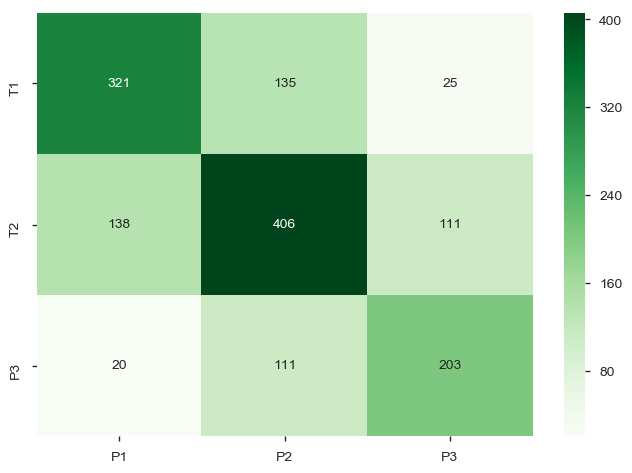

In [68]:
predicted1=dt_g.predict(test_x)
metrics.accuracy_score(predicted1,test_y)
print(metrics.classification_report(predicted1,test_y))
print('Confusion Matrix')
cf=metrics.confusion_matrix(test_y,predicted1)
lbl1=["P1","P2","P3"]
lbl2=["T1","T2","P3"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt="d",xticklabels=lbl1,yticklabels=lbl2)
plt.show();